## Library import

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Import data set

In [278]:
df = pd.read_csv('../raw/earthquick/unClean/japan_earthquakes_combined_filtered.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1995-12-30T23:19:36.080Z,27.958,130.181,23.4,3.4,mb,NaN,NaN,NaN,1.0,...,2014-11-07T00:59:31.074Z,"82 km ESE of Naze, Japan",earthquake,NaN,9.9,NaN,2.0,reviewed,us,us
1,1995-12-30T20:45:14.190Z,40.831,143.190,30.1,5.7,mw,NaN,NaN,NaN,1.0,...,2022-04-29T19:51:40.841Z,"off the east coast of Honshu, Japan",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
2,1995-12-30T16:15:33.090Z,31.025,140.136,116.9,5.3,mw,NaN,NaN,NaN,0.9,...,2016-11-10T00:19:51.375Z,"Izu Islands, Japan region",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
3,1995-12-30T12:23:13.400Z,25.576,124.919,33.0,5.4,mb,NaN,NaN,NaN,1.3,...,2014-11-07T00:59:30.960Z,northeast of Taiwan,earthquake,NaN,NaN,NaN,27.0,reviewed,us,us
4,1995-12-30T12:17:37.040Z,40.745,143.232,33.0,5.7,mb,NaN,NaN,NaN,1.1,...,2022-04-29T19:51:39.284Z,"off the east coast of Honshu, Japan",earthquake,NaN,NaN,NaN,104.0,reviewed,us,us


## Initial Inspections

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41457 entries, 0 to 41456
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             41457 non-null  object 
 1   latitude         41457 non-null  float64
 2   longitude        41457 non-null  float64
 3   depth            41457 non-null  float64
 4   mag              41457 non-null  float64
 5   magType          41457 non-null  object 
 6   nst              22342 non-null  float64
 7   gap              29225 non-null  float64
 8   dmin             12123 non-null  float64
 9   rms              40576 non-null  float64
 10  net              41457 non-null  object 
 11  id               41457 non-null  object 
 12  updated          41457 non-null  object 
 13  place            41457 non-null  object 
 14  type             41457 non-null  object 
 15  horizontalError  10808 non-null  float64
 16  depthError       25275 non-null  float64
 17  magError    

In [280]:
df.isnull().sum()

time                   0
latitude               0
longitude              0
depth                  0
mag                    0
magType                0
nst                19115
gap                12232
dmin               29334
rms                  881
net                    0
id                     0
updated                0
place                  0
type                   0
horizontalError    30649
depthError         16182
magError           29509
magNst              5916
status                 0
locationSource         0
magSource              0
dtype: int64

In [281]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,41457.000000,41457.000000,41457.000000,41457.000000,22342.000000,29225.000000,12123.000000,40576.000000,10808.000000,25275.000000,11948.000000,35541.000000
mean,35.073214,139.764770,70.718338,4.480998,64.694029,116.850337,2.066355,0.874852,7.466603,8.504521,0.121401,26.946062
std,6.073930,6.553554,103.820679,0.473305,89.763086,41.615959,1.529863,0.253780,2.443006,7.044144,0.069131,49.389211
min,24.000000,122.000000,0.000000,2.700000,4.000000,8.000000,0.028000,0.040000,1.300000,0.000000,0.020000,1.000000
25%,29.859900,138.852000,21.200000,4.200000,18.000000,92.000000,1.066000,0.700000,5.900000,4.400000,0.071000,4.000000
50%,36.009000,141.616000,35.000000,4.400000,31.000000,121.700000,1.831000,0.860000,7.300000,6.900000,0.107000,11.000000
75%,39.507000,143.232000,60.900000,4.700000,68.000000,136.100000,2.723500,1.030000,8.800000,10.400000,0.157000,28.000000
max,45.500000,153.976200,686.390000,9.100000,929.000000,353.400000,44.036000,1.940000,23.800000,74.100000,0.700000,884.000000


In [282]:
df.shape

(41457, 22)

## Calculate missing value percentages & Plot

In [283]:
missing_percent = df.isnull().mean() * 100
missing_df = pd.DataFrame({'Column': df.columns, 'Missing (%)': missing_percent}).sort_values(by='Missing (%)', ascending=False)

In [284]:
print("\nMissing Value Percentages:\n", missing_df)


Missing Value Percentages:
                           Column  Missing (%)
horizontalError  horizontalError    73.929614
magError                magError    71.179777
dmin                        dmin    70.757653
nst                          nst    46.108016
depthError            depthError    39.033215
gap                          gap    29.505271
magNst                    magNst    14.270208
rms                          rms     2.125093
time                        time     0.000000
place                      place     0.000000
locationSource    locationSource     0.000000
status                    status     0.000000
type                        type     0.000000
id                            id     0.000000
updated                  updated     0.000000
latitude                latitude     0.000000
net                          net     0.000000
magType                  magType     0.000000
mag                          mag     0.000000
depth                      depth     0.000000
longi

<Figure size 640x480 with 0 Axes>

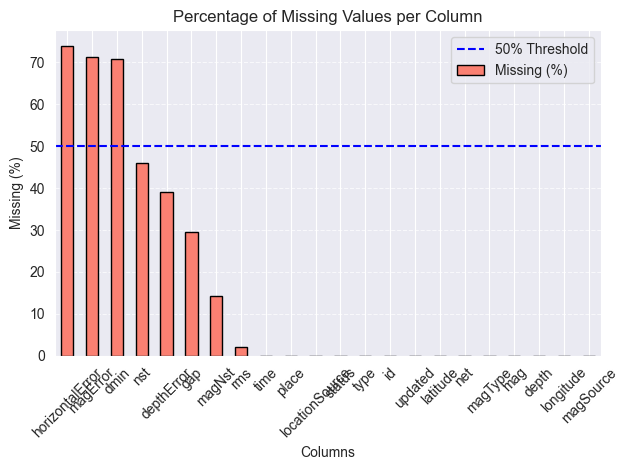

In [285]:
plt.figure()
missing_df.plot(kind='bar', x='Column', y='Missing (%)', color='salmon', edgecolor='black')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Missing (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.axhline(y=50, color='blue', linestyle='--', linewidth=1.5, label='50% Threshold')
plt.legend()
plt.tight_layout()
plt.show()


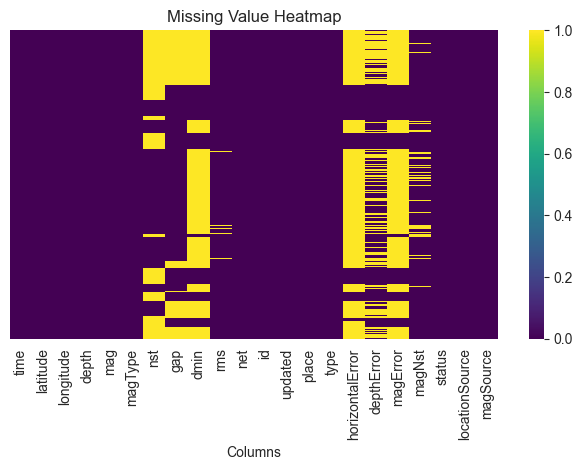

In [286]:
# Heat map plot missing values
plt.figure()
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Value Heatmap')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

## Drop missing values more than 50%

In [287]:
cols_to_drop = [
    'id',
    'updated',
    'net',
    'place',
    'type',
    'status',
    'locationSource',
    'magSource',
    'dmin',
    'horizontalError',
    'magError'
]

df_clean = df.drop(columns=cols_to_drop)

In [288]:
df_clean.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,rms,depthError,magNst
0,1995-12-30T23:19:36.080Z,27.958,130.181,23.4,3.4,mb,NaN,NaN,1.0,9.9,2.0
1,1995-12-30T20:45:14.190Z,40.831,143.190,30.1,5.7,mw,NaN,NaN,1.0,NaN,NaN
2,1995-12-30T16:15:33.090Z,31.025,140.136,116.9,5.3,mw,NaN,NaN,0.9,NaN,NaN
3,1995-12-30T12:23:13.400Z,25.576,124.919,33.0,5.4,mb,NaN,NaN,1.3,NaN,27.0
4,1995-12-30T12:17:37.040Z,40.745,143.232,33.0,5.7,mb,NaN,NaN,1.1,NaN,104.0


## Plot missing values what keeps after dropped

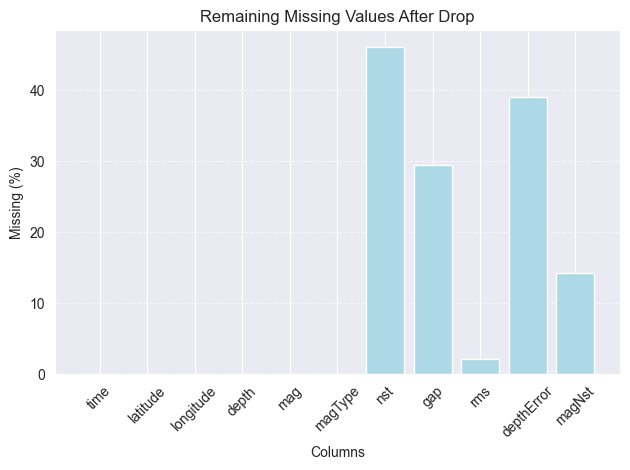

In [289]:
missing_percent_clean = df_clean.isnull().mean() * 100
missing_df_clean = pd.DataFrame({'Column': df_clean.columns, 'Missing (%)': missing_percent_clean})


plt.figure()
plt.bar(missing_df_clean['Column'], missing_df_clean['Missing (%)'], color='lightblue')
plt.title('Remaining Missing Values After Drop')
plt.xlabel('Columns')
plt.ylabel('Missing (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Convert time into month,day,hours

In [290]:
df_clean['time'] = pd.to_datetime(df_clean['time'])
df_clean['year'] = df_clean['time'].dt.year
df_clean['month'] = df_clean['time'].dt.month
df_clean['hour'] = df_clean['time'].dt.hour
df_clean = df_clean.drop(columns=['time'])

## Apply median imputation for missing values to fill

In [291]:
df_clean['nst'] = df_clean['nst'].fillna(df_clean['nst'].median())
df_clean['gap'] = df_clean['gap'].fillna(df_clean['gap'].median())
df_clean['rms'] = df_clean['rms'].fillna(df_clean['rms'].median())
df_clean['depthError'] = df_clean['depthError'].fillna(df_clean['depthError'].median())
df_clean['magNst'] = df_clean['magNst'].fillna(df_clean['magNst'].median())

In [292]:
df_clean.isnull().sum()

latitude      0
longitude     0
depth         0
mag           0
magType       0
nst           0
gap           0
rms           0
depthError    0
magNst        0
year          0
month         0
hour          0
dtype: int64

## after fill missing values plot

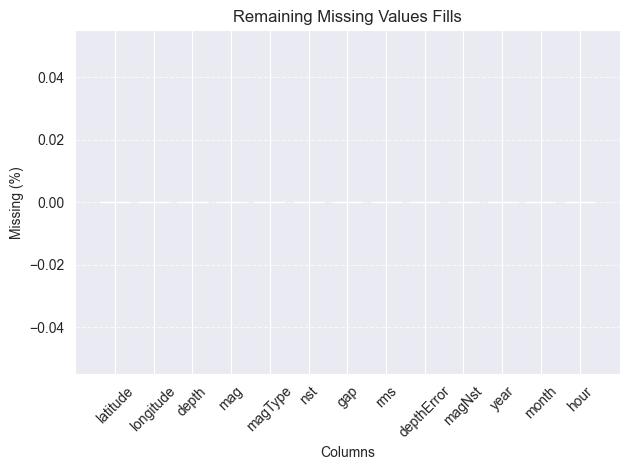

In [293]:
missing_percent_clean = df_clean.isnull().mean() * 100
missing_df_clean = pd.DataFrame({'Column': df_clean.columns, 'Missing (%)': missing_percent_clean})

plt.figure()
plt.bar(missing_df_clean['Column'], missing_df_clean['Missing (%)'], color='lightblue')
plt.title('Remaining Missing Values Fills')
plt.xlabel('Columns')
plt.ylabel('Missing (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Features engineering list

## Feature 1 - Cyclical Time

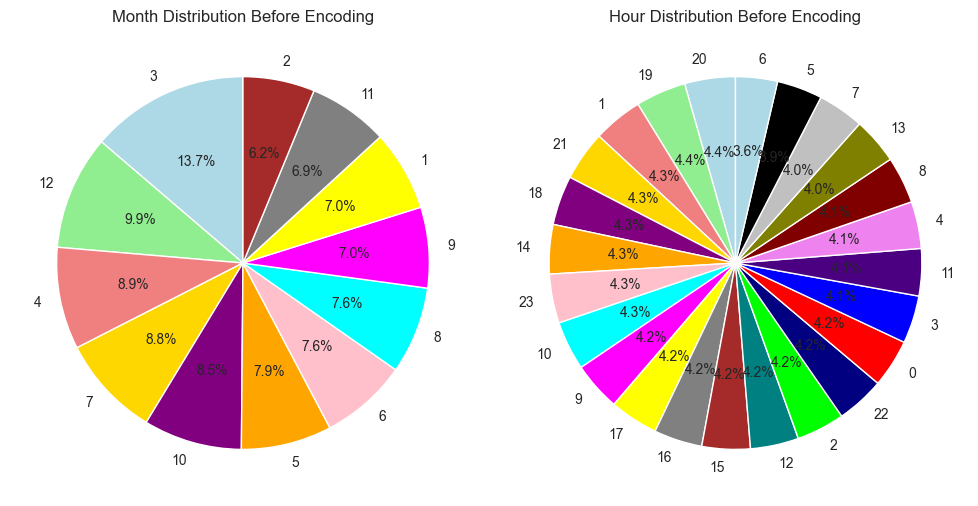

In [294]:
# Before feature engineering
month_counts = df_clean['month'].value_counts()
hour_counts = df_clean['hour'].value_counts()

plt.figure(figsize=(10, 5))

# Month Pie Chart
plt.subplot(1, 2, 1)
plt.pie(month_counts, labels=month_counts.index, colors=['lightblue', 'lightgreen', 'lightcoral', 'gold', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'yellow', 'gray', 'brown'], autopct='%1.1f%%', startangle=90)
plt.title('Month Distribution Before Encoding')

# Hour Pie Chart
plt.subplot(1, 2, 2)
plt.pie(hour_counts, labels=hour_counts.index, colors=['lightblue', 'lightgreen', 'lightcoral', 'gold', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'yellow', 'gray', 'brown', 'teal', 'lime', 'navy', 'red', 'blue', 'indigo', 'violet', 'maroon', 'olive', 'silver', 'black'], autopct='%1.1f%%', startangle=90)
plt.title('Hour Distribution Before Encoding')

plt.tight_layout()
plt.show()


In [295]:
# Feature engineering
df_clean['month_sin'] = np.sin(2 * np.pi * df_clean['month'] / 12)
df_clean['month_cos'] = np.cos(2 * np.pi * df_clean['month'] / 12)
df_clean['hour_sin'] = np.sin(2 * np.pi * df_clean['hour'] / 24)
df_clean['hour_cos'] = np.cos(2 * np.pi * df_clean['hour'] / 24)

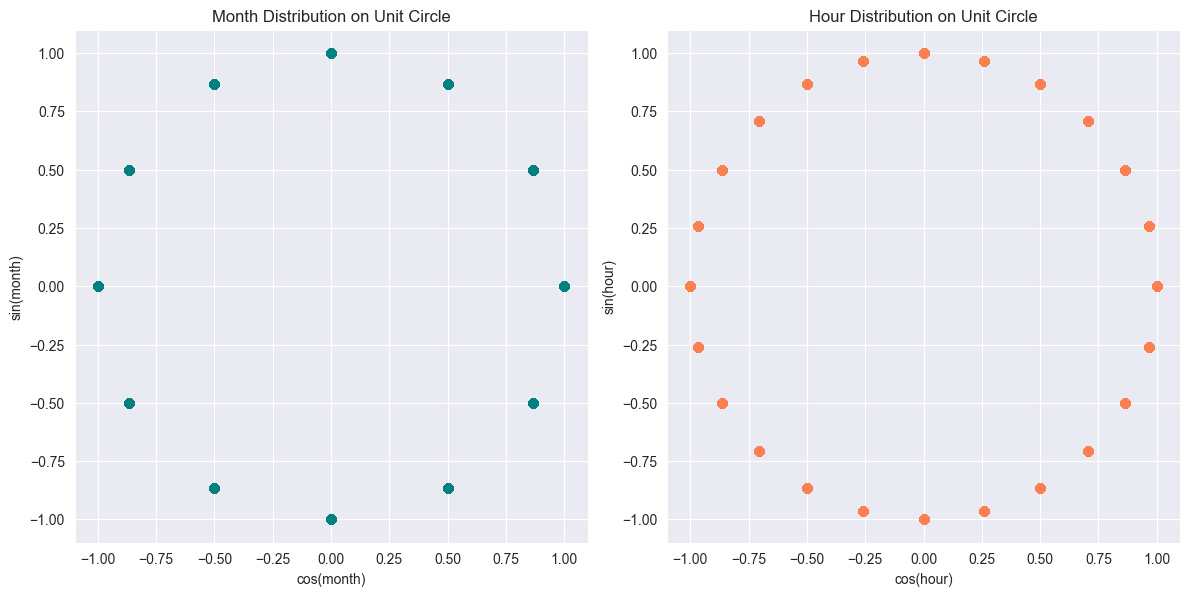

In [296]:
# After feature engineering
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Month on unit circle
axes[0].scatter(df_clean['month_cos'], df_clean['month_sin'], alpha=0.6, color='teal')
axes[0].set_title('Month Distribution on Unit Circle')
axes[0].set_xlabel('cos(month)')
axes[0].set_ylabel('sin(month)')
axes[0].set_aspect('equal')
axes[0].grid(True)

# Hour on unit circle
axes[1].scatter(df_clean['hour_cos'], df_clean['hour_sin'], alpha=0.6, color='coral')
axes[1].set_title('Hour Distribution on Unit Circle')
axes[1].set_xlabel('cos(hour)')
axes[1].set_ylabel('sin(hour)')
axes[1].set_aspect('equal')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [297]:
# Drop month,hour and day
df_clean = df_clean.drop(columns=['month', 'hour', 'day'], errors='ignore')

## Feature 2 - Spatial clustering

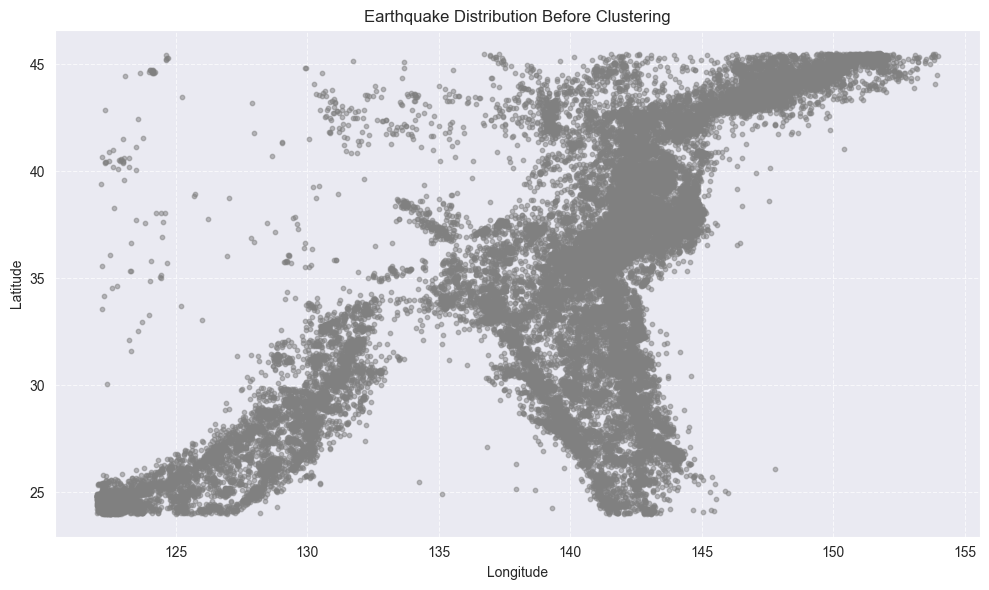

In [298]:
# Before clustering
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['longitude'], df_clean['latitude'], color='gray', alpha=0.5, s=10)
plt.title('Earthquake Distribution Before Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

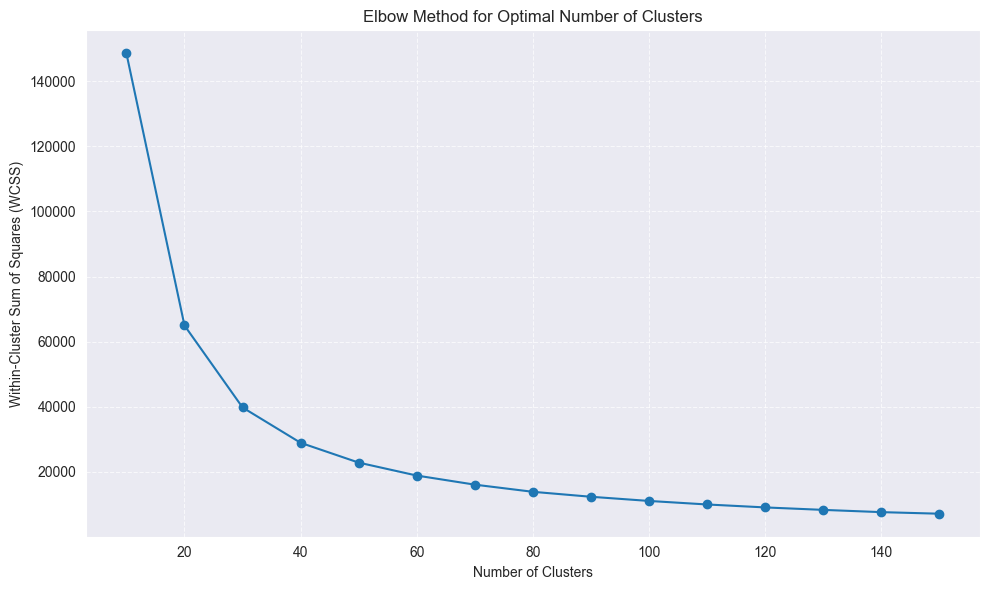

In [299]:
# Find optimal cluster count
wcss = []
for i in range(10, 151, 10):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=20, max_iter=300)
    kmeans.fit(df_clean[['latitude', 'longitude']])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(10, 151, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [300]:
# Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=50, random_state=42, n_init=20, max_iter=300)
df_clean['region'] = kmeans.fit_predict(df_clean[['latitude', 'longitude']])

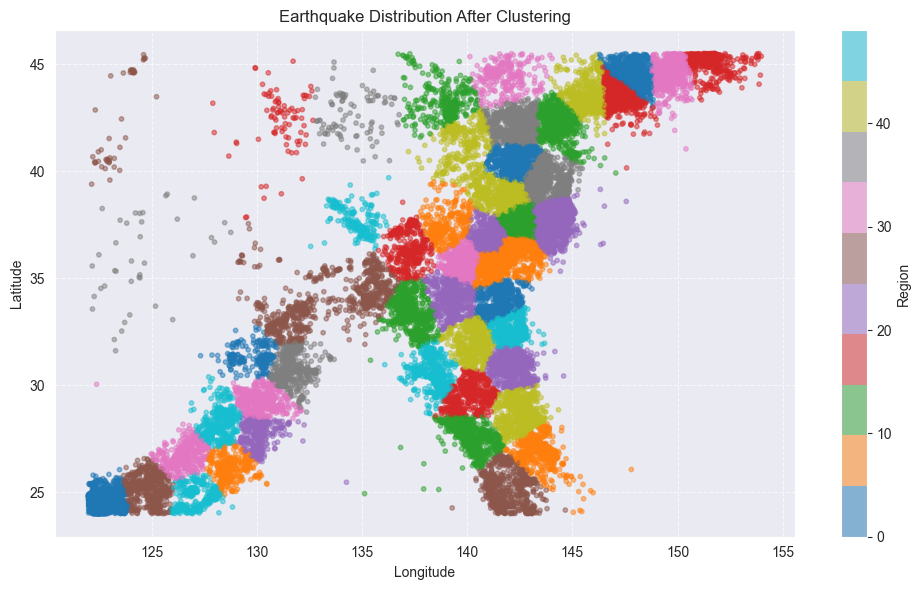

In [301]:
# After clustering
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_clean['longitude'], df_clean['latitude'], c=df_clean['region'], cmap='tab10', alpha=0.5, s=10)
plt.title('Earthquake Distribution After Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(scatter, label='Region')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Feature 3 - Depth separate and encoding

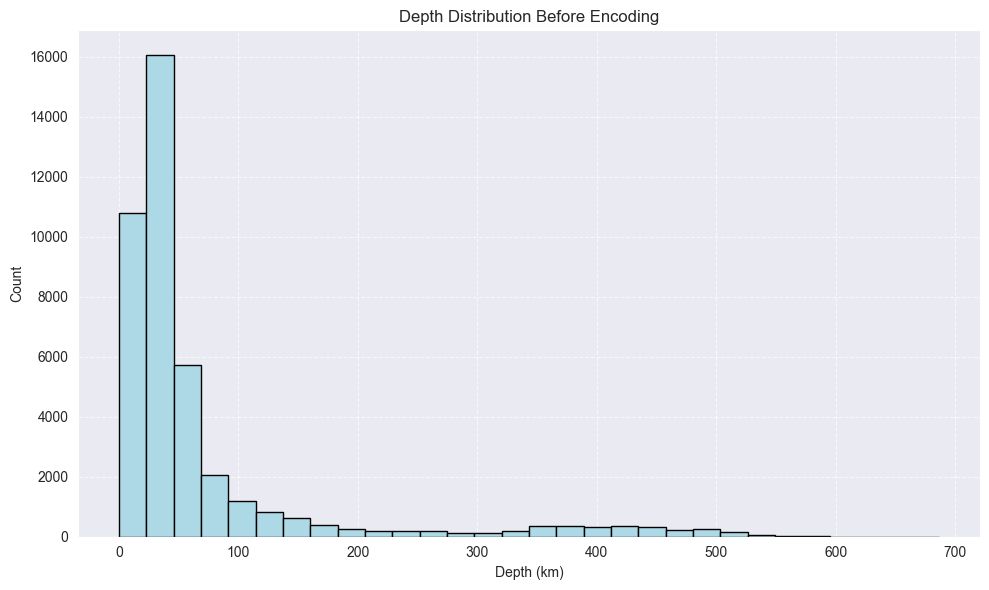

In [302]:
# Before encoding depth distribution
plt.figure(figsize=(10, 6))
plt.hist(df_clean['depth'], bins=30, color='lightblue', edgecolor='black')
plt.title('Depth Distribution Before Encoding')
plt.xlabel('Depth (km)')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [303]:
# One-Hot encoding
df_clean['depth'] = pd.to_numeric(df_clean['depth'], errors='coerce').fillna(df_clean['depth'].median())

# Define bin edges and labels for shallow, mid, deep
bin_edges = [0, 70, 300, np.inf]
bin_labels = ['shallow', 'mid', 'deep']

# Create a temporary column for binning
df_clean['depth_bin'] = pd.cut(df_clean['depth'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# One-hot encode the binned depths directly
depth_encoded = pd.get_dummies(df_clean['depth_bin'], prefix='depth', dtype=int)

# Ensure integer type immediately after get_dummies
depth_encoded = depth_encoded.astype(int)

# Add encoded columns to df_clean
df_clean = pd.concat([df_clean, depth_encoded], axis=1)

# Verify column types
depth_columns = [col for col in df_clean.columns if col.startswith('depth')]
print("\nData types of depth columns:", df_clean[depth_columns].dtypes)

# Drop temporary depth_bin column
df_clean = df_clean.drop(columns=['depth_bin'])

print("\nColumns after depth one-hot encoding:")
print(df_clean.columns.tolist())



Data types of depth columns: depth             float64
depthError        float64
depth_bin        category
depth_shallow       int64
depth_mid           int64
depth_deep          int64
dtype: object

Columns after depth one-hot encoding:
['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap', 'rms', 'depthError', 'magNst', 'year', 'month_sin', 'month_cos', 'hour_sin', 'hour_cos', 'region', 'depth_shallow', 'depth_mid', 'depth_deep']


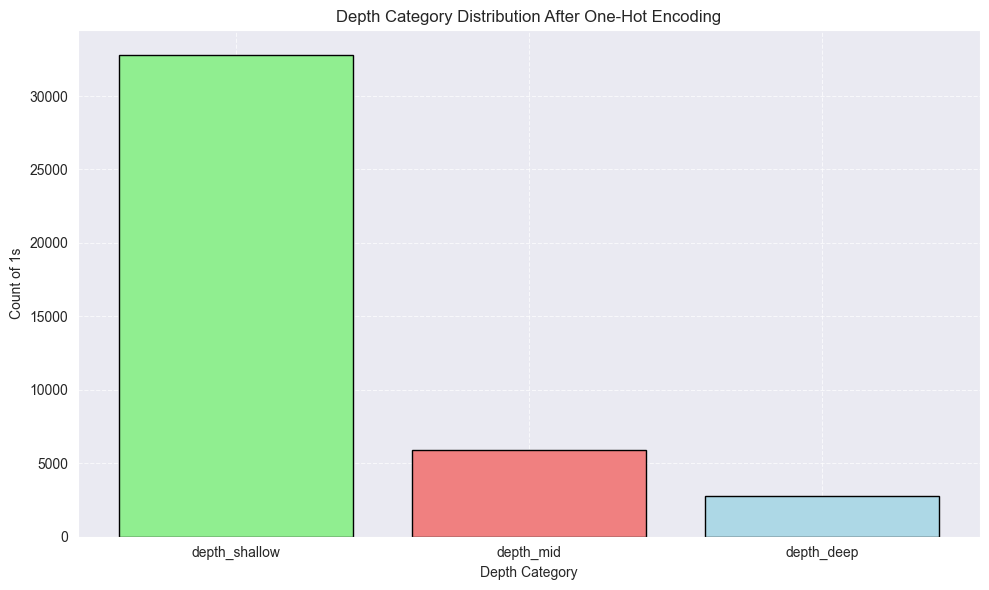

In [304]:
# After encoding One-Hot encoded category distribution
depth_sums = df_clean[['depth_shallow', 'depth_mid', 'depth_deep']].sum()
plt.figure(figsize=(10, 6))
plt.bar(depth_sums.index, depth_sums.values, color=['lightgreen', 'lightcoral', 'lightblue'], edgecolor='black')
plt.title('Depth Category Distribution After One-Hot Encoding')
plt.xlabel('Depth Category')
plt.ylabel('Count of 1s')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Feature 4 - Magnitude Encoding

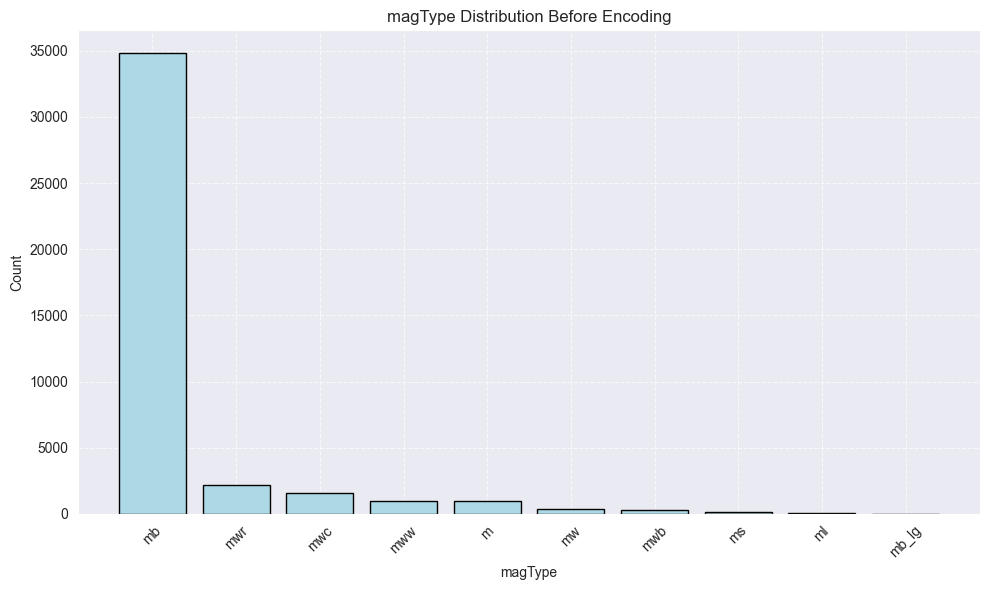

In [305]:
# Before encoding magType distribution
magtype_counts = df_clean['magType'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(magtype_counts.index, magtype_counts.values, color='lightblue', edgecolor='black')
plt.title('magType Distribution Before Encoding')
plt.xlabel('magType')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [306]:
# One-Hot encoding for magType
top_types = ['mb', 'ml', 'md']
df_clean['magType_simple'] = df_clean['magType'].apply(lambda x: x if x in top_types else 'Other')

existing_mag_cols = [col for col in df_clean.columns if col.startswith('mag_')]
if existing_mag_cols:
    df_clean = df_clean.drop(columns=existing_mag_cols)

mag_encoded = pd.get_dummies(df_clean['magType_simple'], prefix='mag', dtype=int)

mag_encoded = mag_encoded.astype(int)

df_clean = pd.concat([df_clean, mag_encoded], axis=1)

mag_columns = [col for col in df_clean.columns if col.startswith('mag_')]
print("\nData types of mag columns:", df_clean[mag_columns].dtypes)

df_clean = df_clean.drop(columns=['magType_simple'])
df_clean = df_clean.drop(columns=['magType'])

print("\nColumns after magnitude one-hot encoding:")
print(df_clean.columns.tolist())


Data types of mag columns: mag_Other    int64
mag_mb       int64
mag_ml       int64
dtype: object

Columns after magnitude one-hot encoding:
['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'rms', 'depthError', 'magNst', 'year', 'month_sin', 'month_cos', 'hour_sin', 'hour_cos', 'region', 'depth_shallow', 'depth_mid', 'depth_deep', 'mag_Other', 'mag_mb', 'mag_ml']


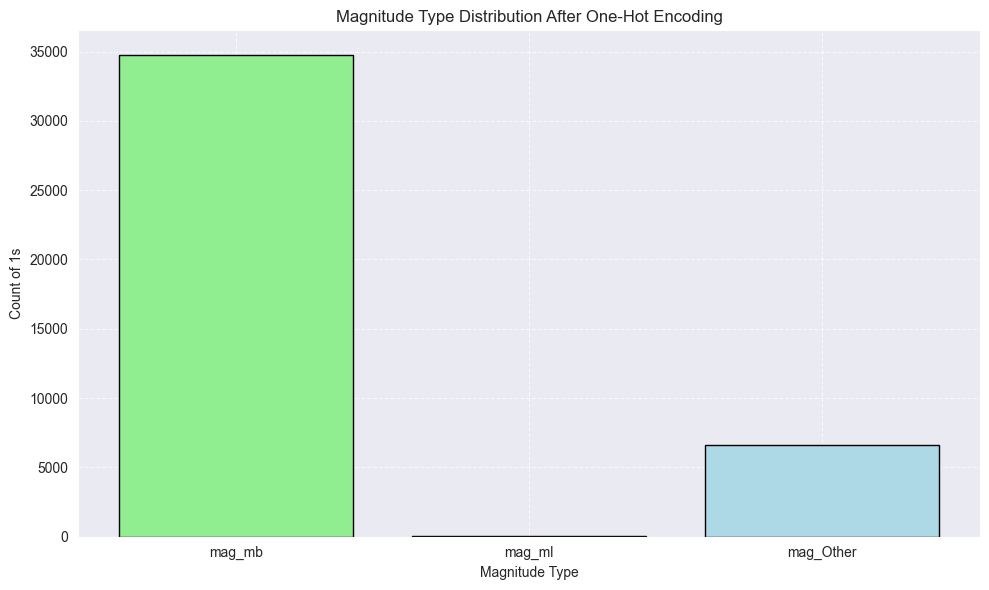

In [307]:
# After encoding magType distribution
mag_sums = df_clean[['mag_mb', 'mag_ml', 'mag_Other']].sum()
plt.figure(figsize=(10, 6))
plt.bar(mag_sums.index, mag_sums.values, color=['lightgreen', 'lightcoral', 'lightblue', 'gray'], edgecolor='black')
plt.title('Magnitude Type Distribution After One-Hot Encoding')
plt.xlabel('Magnitude Type')
plt.ylabel('Count of 1s')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [308]:
df_clean.head()

,latitude,longitude,depth,mag,nst,gap,rms,depthError,magNst,year,...,month_cos,hour_sin,hour_cos,region,depth_shallow,depth_mid,depth_deep,mag_Other,mag_mb,mag_ml
0,27.958,130.181,23.4,3.4,31.0,121.7,1.0,9.9,2.0,1995,...,1.0,-2.588190e-01,0.965926,23,1,0,0,0,1,0
1,40.831,143.190,30.1,5.7,31.0,121.7,1.0,6.9,11.0,1995,...,1.0,-8.660254e-01,0.500000,1,1,0,0,1,0,0
2,31.025,140.136,116.9,5.3,31.0,121.7,0.9,6.9,11.0,1995,...,1.0,-8.660254e-01,-0.500000,40,0,1,0,1,0,0
3,25.576,124.919,33.0,5.4,31.0,121.7,1.3,6.9,27.0,1995,...,1.0,1.224647e-16,-1.000000,25,1,0,0,0,1,0
4,40.745,143.232,33.0,5.7,31.0,121.7,1.1,6.9,104.0,1995,...,1.0,1.224647e-16,-1.000000,1,1,0,0,0,1,0


## Saving clean data set

In [309]:
df_clean.to_csv('cleaned_japan_earthquake.csv', index=False)

## 🦊